# # Setup Notebook

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Discuss the results and what they mean in a markdown section.
####   o	Does the analysis answer any of your existing research questions?
####   o	Does the analysis lead you to any new research questions?


## import libraries and data

In [73]:
# import libraries 
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display   
import matplotlib.pyplot as plt
import plotly.io as pio

In [74]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [75]:
path = r'C:\Users\C SaiVishwanath\Chocolate Bar Ratings Analysis'
df_clean_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavor_of_cacao_clean.csv'))

In [76]:
#drop unnamed column

df_clean_data.drop('Unnamed: 0', axis=1, inplace=True)

In [77]:
#checking table size
df_clean_data.shape

(1795, 9)

In [78]:
df_clean_data.head(10)

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.00,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.00,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.00,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.00,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.00,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.00,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.00,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.00,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.00,France,4.00,,Peru


In [79]:
# Remove NaN values and convert to integers
df_clean_data['cocoa_percent'] = df_clean_data['cocoa_percent'].fillna(0).astype(int)

# Remove leading and trailing spaces from 'Bean_Type' column
df_clean_data['bean_type'] = df_clean_data['bean_type'].str.strip()

# Replace empty strings with 'Missing'
df_clean_data['bean_type'] = df_clean_data['bean_type'].replace('', 'Missing')

# Get the top values of 'Bean_Type'
top_bean_types = df_clean_data['bean_type'].value_counts().head(10)

# Create a DataFrame of top 'Bean_Type' values and their counts
top_bean_types_df = pd.DataFrame({'bean_type': top_bean_types.index, 'Count': top_bean_types.values})

# Create a Styler object to highlight 'Missing' values in the table
def highlight_missing(s):
    is_missing = s == 'Missing'
    return ['background-color: yellow' if v else '' for v in is_missing]

styled_table = top_bean_types_df.style.apply(highlight_missing)

# Display the styled table
styled_table

,bean_type,Count
0,Missing,887
1,Trinitario,419
2,Criollo,153
3,Forastero,87
4,Forastero (Nacional),52
5,"Criollo, Trinitario",48
6,Blend,42
7,Forastero (Arriba),37
8,Criollo (Porcelana),10
9,Forastero (Parazinho),8


### Categorical Column

In [81]:
data = {}
categorical = []
for col in df_clean_data.columns:
    data[col] = [len(df_clean_data[col].unique()), df_clean_data[col].dtype]
    if df_clean_data[col].dtype=='object':
        categorical.append(col)
    #print("values:", data_df[col].unique())
init_data = pd.DataFrame.from_dict(data, orient='index', columns=['Unique Data Count', 'Type'])
display(init_data)
print("\nCategory variables:", categorical)

,Unique Data Count,Type
maker,415,object
specific_origin,1038,object
reference_number,440,int64
review_date,12,int64
cocoa_percent,42,int32
maker_location,58,object
rating,13,float64
bean_type,40,object
broad_origin,97,object



Category variables: ['maker', 'specific_origin', 'maker_location', 'bean_type', 'broad_origin']


In [82]:
df = pd.DataFrame(df_clean_data)

# List of columns to split
columns_to_split = ['maker_location','broad_origin', 'bean_type']

corrections = {'Dom. Rep.':"Dominican Republic", 'Domin. Rep':"Dominican Republic",'Dom. Rep':"Dominican Republic", 'Dominican Rep.':"Dominican Republic", 'D.R.':"Dominican Republic", 'DR': "Dominican Republic",'C.S.':'Central America', 'C. Am.':"Central America", "Ven.":'Venezuela','Venez':"Venezula", "Mex":"Mexico", 'Ven':"Venezula",'Ecuad.':'Ecuador','Trinidad-Tobago':'Trinidad,Tobago', 
 'Mad.':'Madagascar','Mad':'Madagascar','Venezuela/ Ghana':'Venezuela,Ghana','Peru(SMartin' 'Pangoa' 'nacional)':'Peru','Central and S. America':'Central America, South America', 'Carribean(DR/Jam/Tri)':'Carribean', 'Ghana & Madagascar':'Ghana,Madagascar','Ecu.':'Ecuador', 'Nic.':'Nicaragua','Madagascar & Ecuador':'Madagascar,Ecuador','Guat.':'Guatemala','Gre.':'Grenada','Haw.':'Hawaii', 'Sao Tome & Principe':'Sao Tome,Principe'}

# Splitting values separated by commas into separate rows for each column
for column in columns_to_split:
    df[column] = df[column].replace(corrections)
    df[column] = df[column].str.split(',')
    df = df.explode(column).reset_index(drop=True)
    df[column] = df[column].str.strip()
    df[column] = df[column].replace(corrections)

In [83]:
# Define the ranges for cocoa percentages
bins = [0, 50, 60, 70, 80, 90, 100] 
# Define labels for the ranges
labels = ['<50%','50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
# Convert Cocoa Percent values into ranges
df['Cocoa_Percent_Range'] = pd.cut(df['cocoa_percent'], bins=bins, labels=labels, right=False)

col_dic = {}
for col in df.columns:
    #print("column name:", col, "    unique values:", len(df[col].unique()))
    col_dic[col] = len(df[col].unique())
    #print("values:", df[col].unique())

df_unique = pd.DataFrame.from_dict(col_dic, orient='index', columns=['Unique Data Count'])
display(df_unique)

,Unique Data Count
maker,415
specific_origin,1038
reference_number,440
review_date,12
cocoa_percent,42
maker_location,58
rating,13
bean_type,36
broad_origin,65
Cocoa_Percent_Range,7


In [84]:
df.describe()

,reference_number,review_date,cocoa_percent,rating
count,1942.00,1942.00,1942.00,1942.00
mean,1026.48,2012.27,71.71,3.20
std,555.95,2.95,6.36,0.48
min,5.00,2006.00,42.00,1.00
25%,565.00,2010.00,70.00,3.00
50%,1057.00,2013.00,70.00,3.25
75%,1494.00,2015.00,75.00,3.50
max,1952.00,2017.00,100.00,5.00


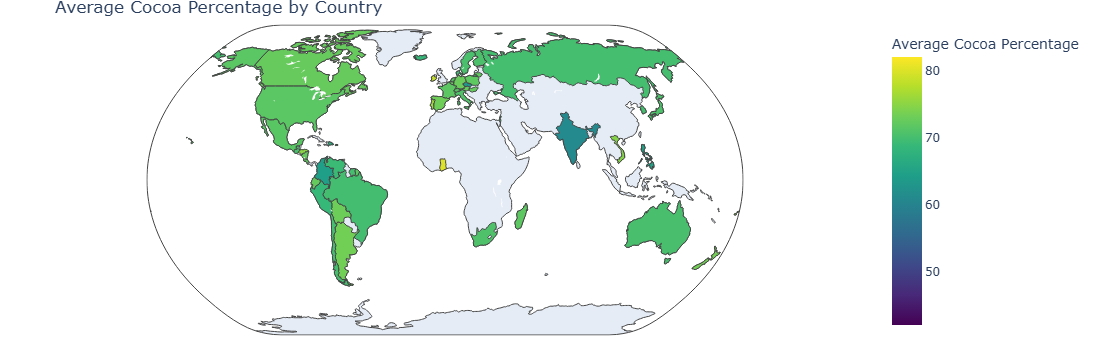

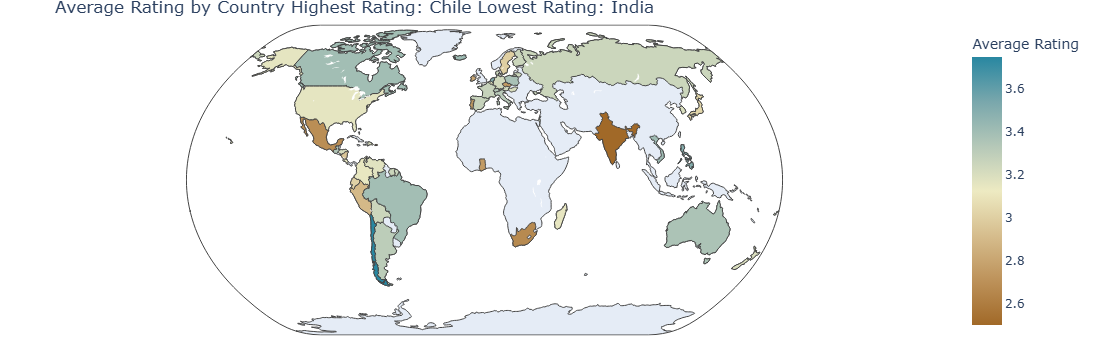

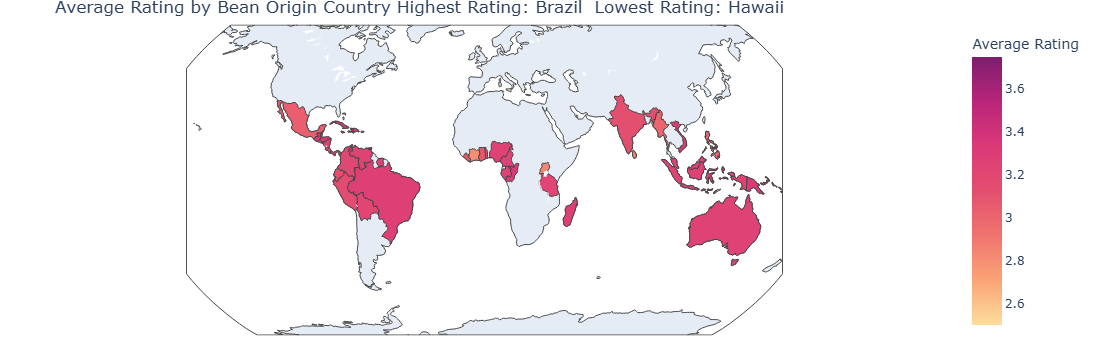

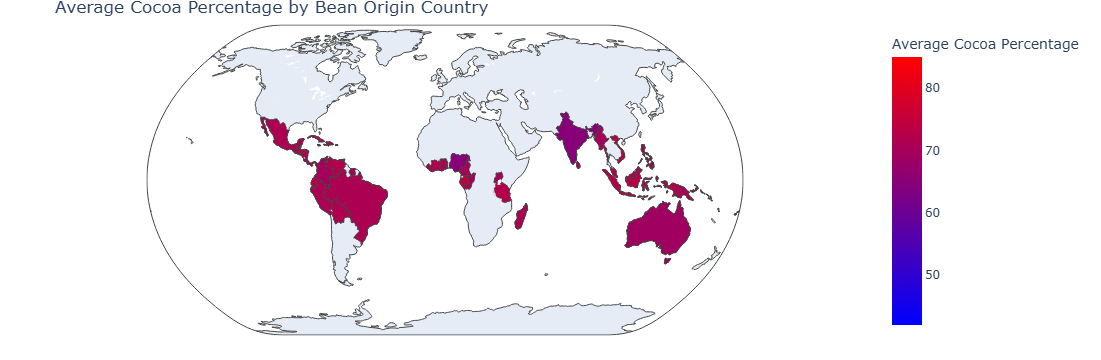

In [85]:
# Aggregate the average cocoa percentage for each country
avg_cocoa_per_country = df.groupby('maker_location')['cocoa_percent'].mean().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_country = df.groupby('maker_location')['rating'].mean().reset_index()
# Get the country with the highest and lowest average rating
highest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig = px.choropleth(avg_cocoa_per_country, 
                    locations='maker_location', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='maker_location',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Country')
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})


# Create a choropleth map
fig2 = px.choropleth(avg_rating_per_country, 
                    locations='maker_location', 
                    locationmode='country names',
                    color='rating',
                    hover_name='maker_location',
                    color_continuous_scale='earth',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Average Rating by Country Highest Rating: {highest_rating["maker_location"]} Lowest Rating: {lowest_rating["maker_location"]}')
fig2.update_layout(margin={"r":25,"t":25,"l":25,"b":25})   

# Aggregate the average cocoa percentage for each country
avg_cocoa_per_origin = df.groupby('broad_origin')['cocoa_percent'].mean().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_origin = df.groupby('broad_origin')['rating'].mean().reset_index()
highest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig3 = px.choropleth(avg_cocoa_per_origin, 
                    locations='broad_origin', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='broad_origin',
                    color_continuous_scale='bluered',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Bean Origin Country')

fig3.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Create a choropleth map
fig4 = px.choropleth(avg_rating_per_origin, 
                    locations='broad_origin', 
                    locationmode='country names',
                    color='rating',
                    hover_name='broad_origin',
                    color_continuous_scale='sunsetdark',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Average Rating by Bean Origin Country Highest Rating: {highest_rating_origin["broad_origin"]}  Lowest Rating: {lowest_rating_origin["broad_origin"]}',
                    fitbounds="locations")


fig4.update_layout(margin={"r":25,"t":25,"l":25,"b":25})


# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig)
display(fig2)
display(fig4)
display(fig3)

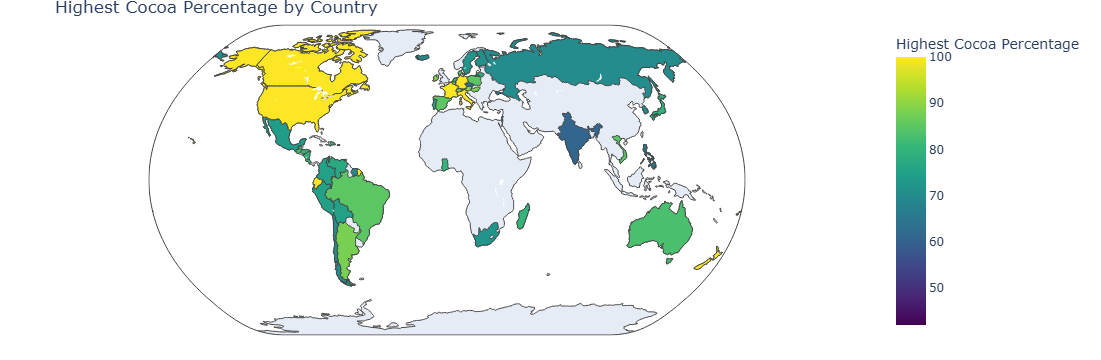

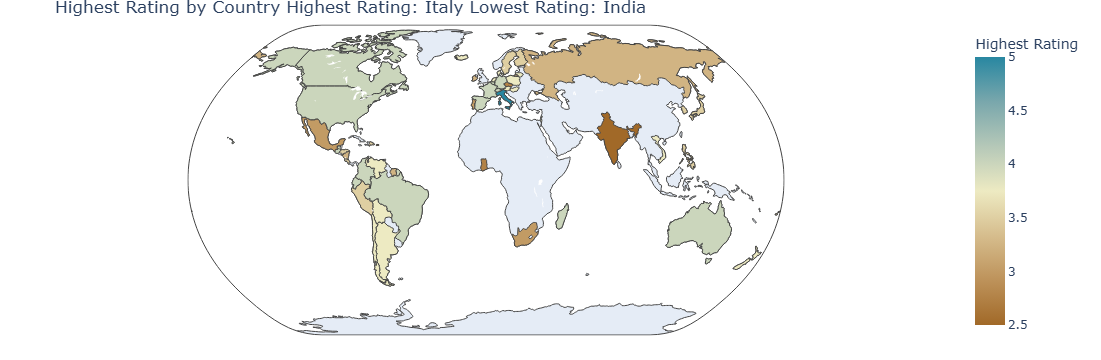

In [86]:
# Aggregate the Highest cocoa percentage for each country
avg_cocoa_per_country = df.groupby('maker_location')['cocoa_percent'].max().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_country = df.groupby('maker_location')['rating'].max().reset_index()
# Get the country with the highest and lowest average rating
highest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig = px.choropleth(avg_cocoa_per_country, 
                    locations='maker_location', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='maker_location',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Highest Cocoa Percentage'},
                    title='Highest Cocoa Percentage by Country')
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Create a choropleth map
fig2 = px.choropleth(avg_rating_per_country, 
                    locations='maker_location', 
                    locationmode='country names',
                    color='rating',
                    hover_name='maker_location',
                    color_continuous_scale='earth',
                    projection='natural earth',
                    labels={'rating': 'Highest Rating'},
                    title=f'Highest Rating by Country Highest Rating: {highest_rating["maker_location"]} Lowest Rating: {lowest_rating["maker_location"]}')
fig2.update_layout(margin={"r":25,"t":25,"l":25,"b":25}) 


# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig)
display(fig2)

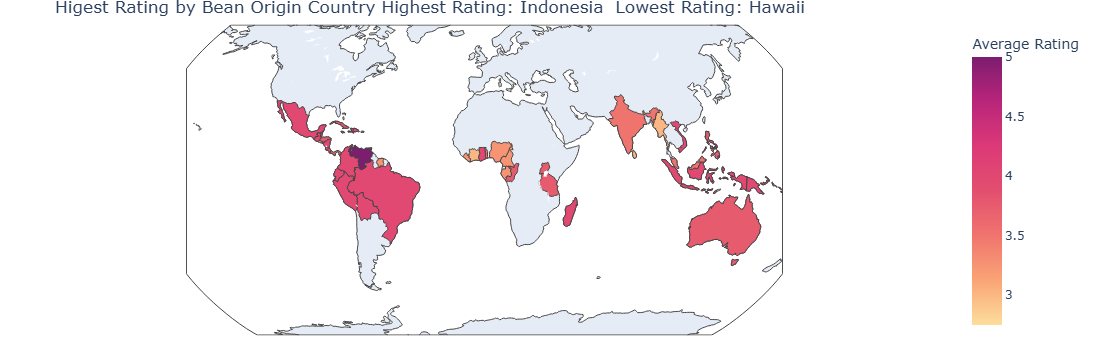

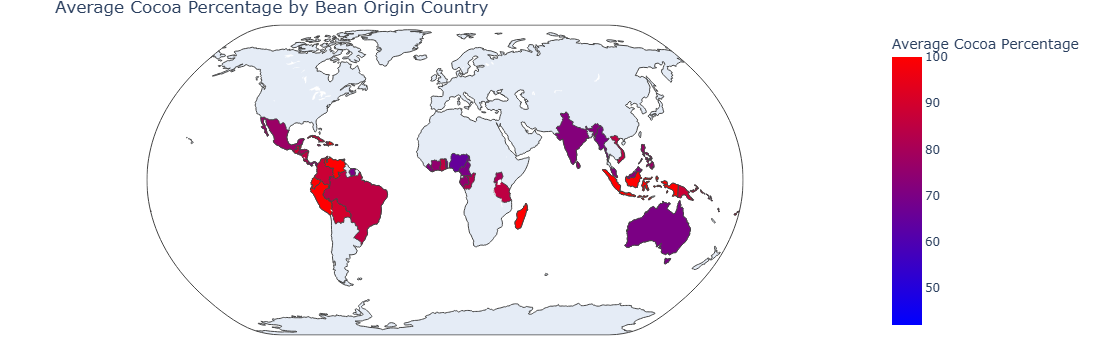

In [87]:
# Aggregate the average cocoa percentage for each country
avg_cocoa_per_origin = df.groupby('broad_origin')['cocoa_percent'].max().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_origin = df.groupby('broad_origin')['rating'].max().reset_index()
highest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig3 = px.choropleth(avg_cocoa_per_origin, 
                    locations='broad_origin', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='broad_origin',
                    color_continuous_scale='bluered',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Bean Origin Country')

fig3.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Create a choropleth map
fig4 = px.choropleth(avg_rating_per_origin, 
                    locations='broad_origin', 
                    locationmode='country names',
                    color='rating',
                    hover_name='broad_origin',
                    color_continuous_scale='sunsetdark',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Higest Rating by Bean Origin Country Highest Rating: {highest_rating_origin["broad_origin"]}  Lowest Rating: {lowest_rating_origin["broad_origin"]}',
                    fitbounds="locations")


fig4.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig4)
display(fig3)

### Does the analysis answer any of your existing research questions?

In [89]:
# What is the average rating by country of origin? Highest rating: Brazil with almost 3.28 
# and the Lowest rating goes to Hawaii with with 3.0

In [90]:
# Where are the best cocoa beans grown?
# Venezuela, Peru, Ecuador, Madagascar, Indonesia

In [91]:
# Which countries produce the highest-rated bars? 
# Venezuela with 5.0

In [92]:
# Average rating by Country: Highest Chile and lowest India